In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving simulated_lora_spectrum.csv to simulated_lora_spectrum.csv


In [ ]:
# Load the dataset
dataset = pd.read_csv("simulated_lora_spectrum.csv")
# Store prediction history
prediction_history = []


# Preprocessing: Scaling features and splitting the data
X = dataset[["rssi", "snr"]]  # Features: RSSI and SNR
y = dataset["occupied"]  # Target: Occupied or Free

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree with class weights
model = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Save the trained model and scaler for later use
joblib.dump(model, "spectrum_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Print classification report and accuracy
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy on Test Data: 1.0


In [ ]:
# Randomly select a row from the dataset for prediction
random_row = dataset.sample(n=1)

# Extract the RSSI, SNR, and Frequency values
new_rssi = random_row['rssi'].values[0]
new_snr = random_row['snr'].values[0]
new_freq = random_row['frequency'].values[0]

# Create a DataFrame for prediction
features = pd.DataFrame([[new_rssi, new_snr]], columns=["rssi", "snr"])

# Apply the same scaling as during training
features_scaled = scaler.transform(features)

# Make the prediction
prediction = model.predict(features_scaled)
status = "Occupied" if prediction[0] == 1 else "Free"

# Print prediction with frequency
print(f"Prediction → RSSI: {new_rssi}, SNR: {new_snr}, Frequency: {new_freq} → Status: {status}")


Prediction → RSSI: -116.05, SNR: -4.75, Frequency: 433.92 → Status: Free


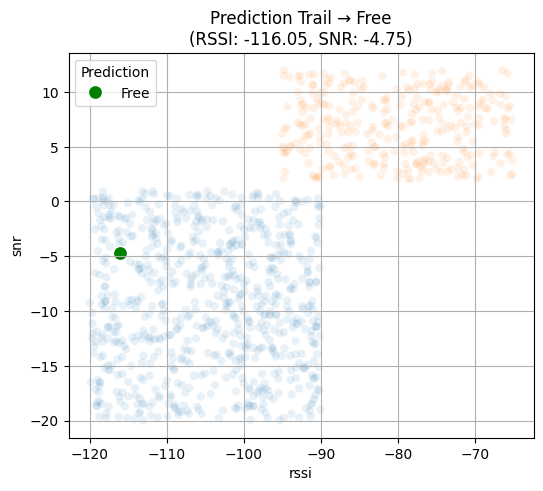

In [ ]:
# Append prediction to history
prediction_history.append({
    "RSSI": new_rssi,
    "SNR": new_snr,
    "Frequency": new_freq,
    "Prediction": status
})


# Convert to DataFrame for plotting
hist_df = pd.DataFrame(prediction_history)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.scatterplot(data=dataset, x="rssi", y="snr", hue="occupied", alpha=0.1, legend=False)
sns.scatterplot(data=hist_df, x="RSSI", y="SNR", hue="Prediction", s=100,
                palette={"Free": "green", "Occupied": "red"})
plt.title(f"Prediction Trail → {status}\n(RSSI: {new_rssi:.2f}, SNR: {new_snr:.2f})")
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import display

# Show the latest prediction history as a clean table
hist_df = pd.DataFrame(prediction_history)
display(hist_df.tail(10))  # Show last 10 predictions

,RSSI,SNR,Frequency,Prediction
0,-116.05,-4.75,433.92,Free


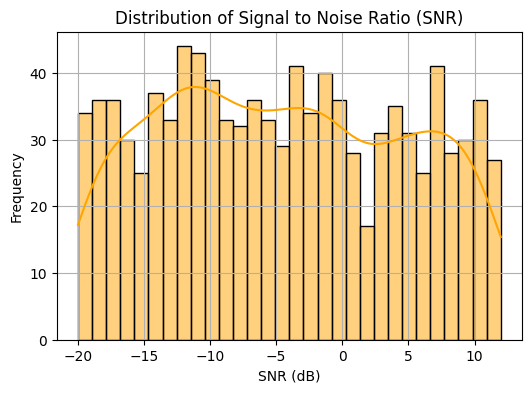

In [ ]:
# Assuming 'snr' column in dataset contains SNR values
plt.figure(figsize=(6, 4))
sns.histplot(dataset['snr'], kde=True, bins=30, color='orange')
plt.title("Distribution of Signal to Noise Ratio (SNR)")
plt.xlabel("SNR (dB)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<ipython-input-11-6adb2ad64450>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_usage = dataset.groupby(['freq_bin', 'occupied']).size().unstack(fill_value=0)


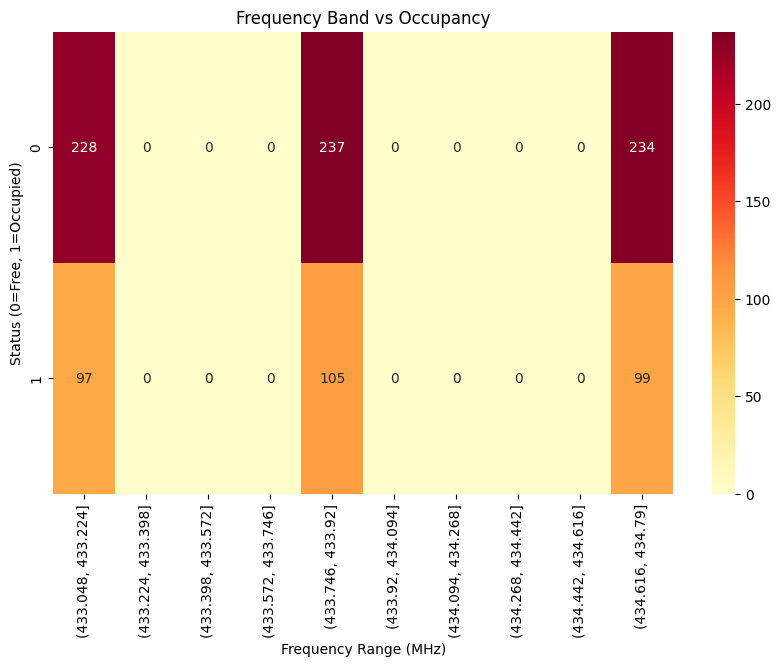

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for frequency ranges
dataset['freq_bin'] = pd.cut(dataset['frequency'], bins=10)

# Group by frequency bins and occupancy
freq_usage = dataset.groupby(['freq_bin', 'occupied']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(freq_usage.T, cmap='YlOrRd', annot=True, fmt='d')
plt.title("Frequency Band vs Occupancy")
plt.xlabel("Frequency Range (MHz)")
plt.ylabel("Status (0=Free, 1=Occupied)")
plt.show()

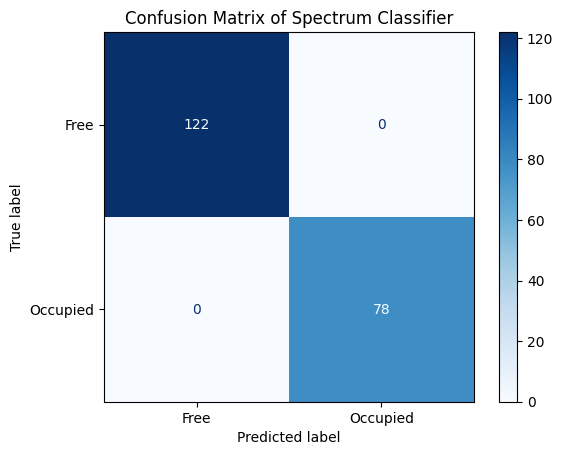

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Free", "Occupied"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Spectrum Classifier")
plt.show()

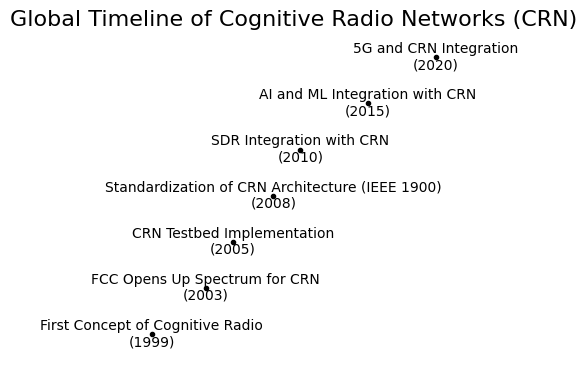

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Data for the global CRN timeline
stages = [
    ("First Concept of Cognitive Radio", "1999-01-01"),
    ("FCC Opens Up Spectrum for CRN", "2003-01-01"),
    ("CRN Testbed Implementation", "2005-01-01"),
    ("Standardization of CRN Architecture (IEEE 1900)", "2008-01-01"),
    ("SDR Integration with CRN", "2010-01-01"),
    ("AI and ML Integration with CRN", "2015-01-01"),
    ("5G and CRN Integration", "2020-01-01")
]

# Convert date strings to datetime objects
dates = [datetime.strptime(date, "%Y-%m-%d") for _, date in stages]
events = [event for event, _ in stages]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 4))
# Plot the vertical timeline with dates
ax.plot(dates, range(len(dates)), "ko", markersize=3)  # Black circles for markers

# Add text labels for each stage with dates
for i, (event, date) in enumerate(zip(events, dates)):
    ax.text(date, i, f"{event}\n({date.strftime('%Y')})", fontsize=10, verticalalignment="center", ha='center')

# Set the x-axis to display dates with reduced intervals
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate the date labels for better readability
plt.xticks(rotation=45, ha='right')

# Set limits and remove extra vertical space
ax.set_ylim(-1, len(events) - 0.5)
ax.set_xlim(min(dates) - (max(dates) - min(dates)) * 0.1, max(dates) + (max(dates) - min(dates)) * 0.1)

# Remove the axis lines
ax.axis("off")

# Add a title
plt.title("Global Timeline of Cognitive Radio Networks (CRN)", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()
